In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
with open("../scaling_summary_wn.csv","r") as fd:
    lines=fd.readlines()

summary_uw=[]
summary_uw_header=[]
for line in lines:
    larr=line.strip().split(',')
    if len(larr)<15:
        continue #bad line
    if larr[0][0]=='#':
        summary_uw_header=larr
    else:
        summary_uw.append(larr)

In [3]:
i_n_samples=0
i_n_embs=14
i_org_cpu=1
i_cpu=4
i_gpu_v=7
i_gpu_3s=10

In [4]:
n_samples=[]
n_embs=[]
org_cpu=[]
cpu=[]
gpu_v=[]
gpu_3s=[]
for el in summary_uw:
    n_samples.append(int(el[i_n_samples]))
    n_embs.append(int(el[i_n_embs]))
    if el[i_org_cpu]!='':
        org_cpu.append(int(el[i_org_cpu])/3600.0)
    if el[i_cpu]!='':
        cpu.append(int(el[i_cpu])/3600.0)
    if el[i_gpu_v]!='':
        gpu_v.append(int(el[i_gpu_v])/3600.0)
    if el[i_gpu_3s]!='':
        gpu_3s.append(int(el[i_gpu_3s])/3600.0)
    

In [5]:
#x = n_samples
#y = np.vstack([org_cpu,cpu,gpu_3s])

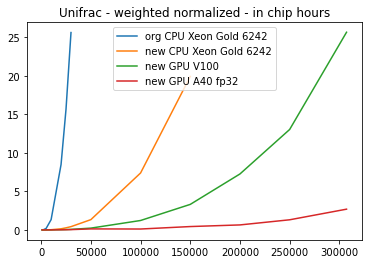

In [6]:
fig, ax = plt.subplots()
#ax.plot(n_samples[:len(org_cpu)], org_cpu,
#        n_samples[:len(cpu)], cpu,
#        n_samples[:len(gpu_3s)], gpu_3s)
ax.plot(n_samples[:len(org_cpu)], org_cpu, label="org CPU Xeon Gold 6242")
ax.plot(n_samples[:len(cpu)], cpu, label="new CPU Xeon Gold 6242")
ax.plot(n_samples[:len(gpu_v)], gpu_v, label="new GPU V100")
ax.plot(n_samples[:len(gpu_3s)], gpu_3s, label="new GPU A40 fp32")

plt.title("Unifrac - weighted normalized - in chip hours")
ax.legend(loc='upper center')
plt.show()
